# Dynamic Model of a Cart with a (not-inverted) pendulum (2D)

In [1]:
from sympy import *
from sympy.physics.mechanics import dynamicsymbols, init_vprinting

init_vprinting()

# Time and input variable
t, u = symbols('t u')

# Physical parameters
m, M, l, g = symbols('m M l g')

# Load angle
alpha = dynamicsymbols('\talpha')

# Angular Velocity
alphadot = diff(alpha,t)

# Angular Acceleration
alphaddot = diff(alphadot,t)

## Coordinates $(x,\alpha)$

In [2]:
# Position
x = dynamicsymbols('x')
xL = x - l*sin(alpha) # xL as function of x
zL =   - l*cos(alpha) # zL as function of z

# Velocities
xdot = diff(x,t)

xLdot = diff(xL,t)
zLdot = diff(zL,t)

# Accelerations
xddot = diff(xdot,t)

xLddot = diff(xLdot,t)
zLddot = diff(zLdot,t)

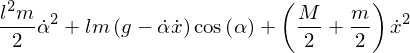

In [27]:
L = M/2*xdot**2 + m/2*(xLdot**2+zLdot**2) - m*g*zL
L = simplify(expand(L))
L = collect(L,xdot**2)
L = collect(L,m*l*cos(alpha))
L

$$ L = \frac{(M+m)}{2}\dot{x}^2 + \frac{ml^2}{2}\dot{\alpha}^2 + ml\cos{\alpha}(g-\dot{\alpha}\dot{x})$$

In [28]:
eqX = simplify(diff(diff(L,xdot),t) - diff(L,x)-u)
eqX

In [29]:
eqAlpha = simplify(diff(diff(L,alphadot),t) - diff(L,alpha))
eqAlpha

### Dynamic Model $(x,z,\alpha)$

$$
\begin{align}
(M+m)\,\ddot{x} - ml\cos{\alpha}\,\ddot{\alpha} + ml\sin{\alpha}\,\dot{\alpha}^2 &= u \\
ml^2\,\ddot{\alpha} - ml\cos{\alpha}\,\ddot{x}  + mgl\sin{\alpha} &= 0
\end{align}
$$ 

In [16]:
res = solve([eqX,eqAlpha],[xddot,alphaddot])

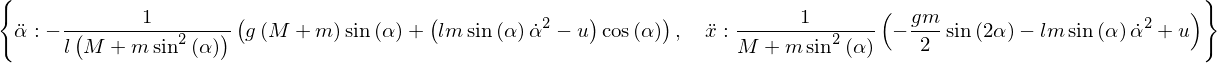

In [17]:
res

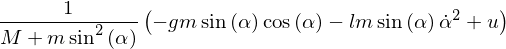

In [30]:
fx = res[xddot]
# fx = collect(collect(fx,m*u),u)
fx = expand_trig(fx)
fx

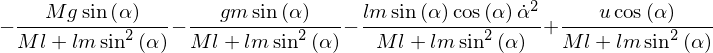

In [26]:
falpha = res[alphaddot]
falpha = expand(falpha)
collect(falpha,g*sin(alpha))
falpha

### Accelerations $(x,z,\alpha)$
$$
\begin{align}
\ddot{x} &= \left[\frac{-m\sin{\alpha}(g\cos{\alpha}+l\dot{\alpha}^2)}{M+m\sin^2\alpha}\right] + \left[\frac{-m\cos\alpha\sin(\alpha-\theta) +M\sin{\theta}}{M(M+m)}\right]u_1 \\
\ddot{z} &= \left[-\frac{ml\cos{\alpha}\,\dot{\alpha}^2}{M+m}-g\right] + \left[\frac{m\sin\alpha\sin(\alpha-\theta) +M\cos{\theta}}{M(M+m)}\right]u_1 \\
\ddot{\alpha} &= \left[\frac{\sin(\theta-\alpha)}{Ml}\right]u_1
\end{align}
$$

## Coordinates $(x_L,z_L,\alpha)$

In [122]:
# Position
xL,zL = dynamicsymbols('x_L z_L')
x = xL + l*sin(alpha) # x as function of xL
z = zL + l*cos(alpha) # z as function of zL

# Velocities
xdot = diff(x,t)
zdot = diff(z,t)

xLdot = diff(xL,t)
zLdot = diff(zL,t)

thetadot = diff(theta,t)
alphadot = diff(alpha,t)

# Accelerations
xddot = diff(xdot,t)
zddot = diff(zdot,t)

xLddot = diff(xLdot,t)
zLddot = diff(zLdot,t)

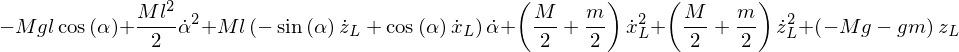

In [123]:
L = M/2*(xdot**2+zdot**2) + m/2*(xLdot**2+zLdot**2) - M*g*z - m*g*zL
L = simplify(expand(L))
L = collect(collect(L,zLdot**2),xLdot**2)
L = collect(L,g)
L = collect(L,M*l*alphadot)
L

$$ L = \left(\frac{M+m}{2}\right)\left(\dot{x}_L^2 + \dot{z}_L^2\right) + \frac{Ml^2}{2}\dot{\alpha}^2 + Ml\dot{\alpha}\left(\dot{x}_L\cos{\alpha}-\dot{z}_L\sin{\alpha}\right)  + g\left[-Ml\cos\alpha-(M+m)z_L\right]$$

In [124]:
eqX = simplify(diff(diff(L,xLdot),t) - diff(L,xL)-ux*u1)
eqX

In [126]:
eqAlpha = simplify(diff(diff(L,alphadot),t) - diff(L,alpha))
eqAlpha

### Dynamic Model $(x_L,z_L,\alpha)$

$$
\begin{align}
(M+m)\,\ddot{x}_L + Ml\cos{\alpha}\,\ddot{\alpha} - Ml\sin{\alpha}\,\dot{\alpha}^2 &= \sin{\theta}\,u_1 \\
(M+m)\,\ddot{z}_L - Ml\sin{\alpha}\,\ddot{\alpha} - Ml\cos{\alpha}\,\dot{\alpha}^2 + (M+m)g &= \cos{\theta}\,u_1 \\
Ml^2\,\ddot{\alpha} + Ml\cos{\alpha}\,\ddot{x}_L - Ml\sin{\alpha}\,\ddot{z}_L - Mgl\sin{\alpha} &= 0
\end{align}
$$ 

In [127]:
res = solve([eqX,eqZ,eqAlpha],[xLddot,zLddot,alphaddot])

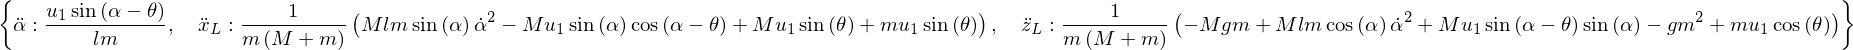

In [128]:
res

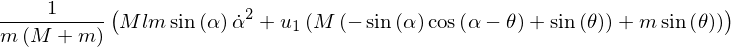

In [131]:
fxL = res[xLddot]
fxL = collect(collect(fxL,M*u1),u1)
fxL

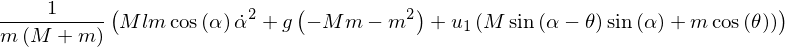

In [133]:
fzL = res[zLddot]
fzL = collect(fzL,u1)
fzL = collect(fzL,g)
fzL

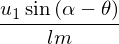

In [134]:
falpha = res[alphaddot]
falpha

### Accelerations $(x_L,z_L,\alpha)$
$$
\begin{align}
\ddot{x}_L &= \left[\frac{Ml\sin{\alpha}\,\dot{\alpha}^2}{M+m}\right] + \left[\frac{-M\cos\alpha\sin(\alpha-\theta) +m\sin{\theta}}{m(M+m)}\right]u_1 \\
\ddot{z}_L &= \left[\frac{Ml\cos{\alpha}\,\dot{\alpha}^2}{M+m}-g\right] + \left[\frac{M\sin\alpha\sin(\alpha-\theta) +m\cos{\theta}}{m(M+m)}\right]u_1 \\
\ddot{\alpha} &= \left[\frac{\sin(\alpha-\theta)}{ml}\right]u_1
\end{align}
$$

## Summary

### Dynamic Model

####  $(x,z,\alpha)$

$$
\begin{align}
(M+m)\,\ddot{x} - ml\cos{\alpha}\,\ddot{\alpha} + ml\sin{\alpha}\,\dot{\alpha}^2 &= \sin{\theta}\,u_1 \\
(M+m)\,\ddot{z} + ml\sin{\alpha}\,\ddot{\alpha} + ml\cos{\alpha}\,\dot{\alpha}^2 + (M+m)g &= \cos{\theta}\,u_1 \\
ml^2\,\ddot{\alpha} - ml\cos{\alpha}\,\ddot{x} + ml\sin{\alpha}\,\ddot{z} + mgl\sin{\alpha} &= 0
\end{align}
$$ 

#### $(x_L,z_L,\alpha)$

$$
\begin{align}
(M+m)\,\ddot{x}_L + Ml\cos{\alpha}\,\ddot{\alpha} - Ml\sin{\alpha}\,\dot{\alpha}^2 &= \sin{\theta}\,u_1 \\
(M+m)\,\ddot{z}_L - Ml\sin{\alpha}\,\ddot{\alpha} - Ml\cos{\alpha}\,\dot{\alpha}^2 + (M+m)g &= \cos{\theta}\,u_1 \\
Ml^2\,\ddot{\alpha} + Ml\cos{\alpha}\,\ddot{x}_L - Ml\sin{\alpha}\,\ddot{z}_L - Mgl\sin{\alpha} &= 0
\end{align}
$$ 

### Accelerations

#### $(x,z,\alpha)$
$$
\begin{align}
\ddot{x} &= \left[\frac{-ml\sin{\alpha}\,\dot{\alpha}^2}{M+m}\right] + \left[\frac{-m\cos\alpha\sin(\alpha-\theta) +M\sin{\theta}}{M(M+m)}\right]u_1 \\
\ddot{z} &= \left[-\frac{ml\cos{\alpha}\,\dot{\alpha}^2}{M+m}-g\right] + \left[\frac{m\sin\alpha\sin(\alpha-\theta) +M\cos{\theta}}{M(M+m)}\right]u_1 \\
\ddot{\alpha} &= \left[\frac{-\sin(\alpha-\theta)}{Ml}\right]u_1
\end{align}
$$

### Accelerations

#### $(x_L,z_L,\alpha)$
$$
\begin{align}
\ddot{x}_L &= \left[\frac{Ml\sin{\alpha}\,\dot{\alpha}^2}{M+m}\right] + \left[\frac{-M\cos\alpha\sin(\alpha-\theta) +m\sin{\theta}}{m(M+m)}\right]u_1 \\
\ddot{z}_L &= \left[\frac{Ml\cos{\alpha}\,\dot{\alpha}^2}{M+m}-g\right] + \left[\frac{M\sin\alpha\sin(\alpha-\theta) +m\cos{\theta}}{m(M+m)}\right]u_1 \\
\ddot{\alpha} &= \left[\frac{\sin(\alpha-\theta)}{ml}\right]u_1
\end{align}
$$